<a href="https://colab.research.google.com/github/QuangLe102/AI/blob/main/Classification_animal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

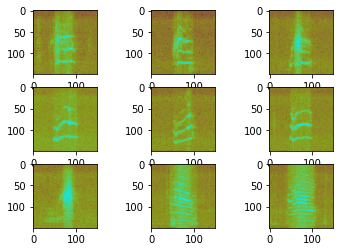

In [ ]:
#import thư viện

from sklearn.utils import shuffle

import math as m

import cv2
import wave
import pylab
import pickle
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.layers import Dense, Activation, Dropout,Flatten
from tensorflow.keras.utils import to_categorical 

with open('../content/drive/MyDrive/DATA_10/Classification_CNN.pickle', 'rb') as f:
  (x_train, y_train), (x_test, y_test) = pickle.load(f)
x_pre = x_test
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
y_train.shape

(1800,)

In [ ]:
y_test.shape

(200,)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train.shape

(1800, 10)

In [ ]:
from keras.layers.pooling import MaxPooling2D
from keras.layers import Conv2D
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2, 2)))

#ANN
model.add(Flatten())
model.add(Dense(64, activation = 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 128)     

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 10, batch_size=64, validation_data = (x_test, y_test), verbose = 1)
model.save('Classification.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
29/29 [==============================] - 74s 3s/step - loss: 1.9286 - accuracy: 0.3017 - val_loss: 2.0348 - val_accuracy: 0.3600
Epoch 2/10
29/29 [==============================] - 72s 2s/step - loss: 1.2704 - accuracy: 0.5694 - val_loss: 1.2251 - val_accuracy: 0.5650
Epoch 3/10
29/29 [==============================] - 74s 3s/step - loss: 0.7619 - accuracy: 0.7600 - val_loss: 0.7693 - val_accuracy: 0.7250
Epoch 4/10
29/29 [==============================] - 72s 2s/step - loss: 0.4977 - accuracy: 0.8367 - val_loss: 0.6153 - val_accuracy: 0.7800
Epoch 5/10
29/29 [==============================] - 75s 3s/step - loss: 0.3816 - accuracy: 0.8756 - val_loss: 0.4667 - val_accuracy: 0.8350
Epoch 6/10
29/29 [==============================] - 73s 3s/step - loss: 0.3217 - accuracy: 0.8800 - val_loss: 0.5145 - val_accuracy: 0.8150
Epoch 7/10
29/29 [==============================] - 73s 3s/step - loss: 0.2309 - accuracy: 0.9150 - val_loss: 0.6547 - val_accuracy: 0.7750
Epoch 8/10
29/29 [==

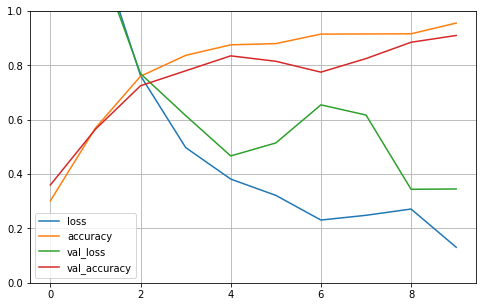

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
from keras.models import load_model
model1 = keras.models.load_model('../content/Classification.h5')

(150, 150, 3)
[7]


'GOAT'

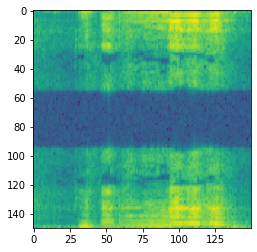

In [ ]:
test =150
plt.imshow(cv2.cvtColor(x_pre[test], cv2.COLOR_BGR2RGB))
print(x_pre[test].shape)
img = x_pre[test].reshape(1, 150, 150, 3)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['CAT', 'DOG','ROOSTER','CRICKET','DUCK','FROG','MONKEY','GOAT','ELEPHANT','COW']
Label[pred[0]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


[7]


'GOAT'

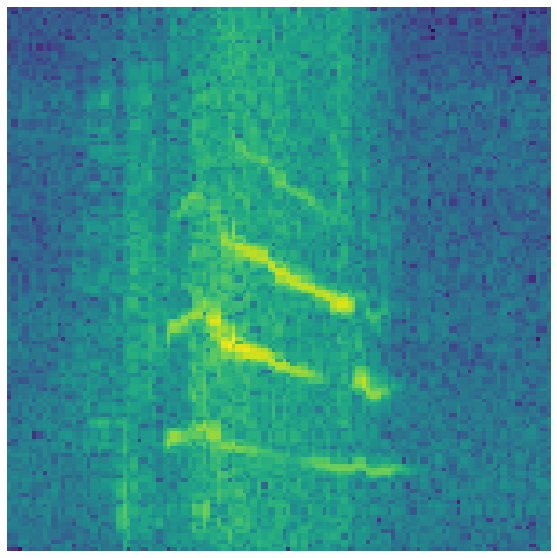

In [ ]:
import IPython.display as ipd
import librosa.display
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    fig = plt.figure(num=None, figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    plt.subplot(111)
    plt.specgram(sound_info, Fs=frame_rate)
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

dir_wav = "../content/B_BRI01_MC_FI_SIM01_201.wav"

ipd.display(ipd.Audio(dir_wav))
signal, sr = librosa.load(dir_wav, duration=10)  # sr = sampling rate
get_wav_info(dir_wav)
graph_spectrogram(dir_wav)
plt.savefig("test.png", dpi=400, bbox_inches='tight', pad_inches=0)
img = load_img("test.png", target_size = (150, 150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 150, 150, 3)
img = img.astype('float32')
img = img / 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['CAT', 'DOG','ROOSTER','CRICKET','DUCK','FROG','MONKEY','GOAT','ELEPHANT','COW']
Label[pred[0]]

[6]


'MONKEY'

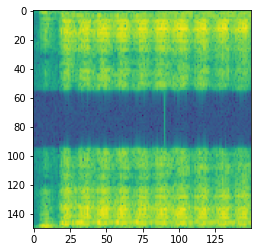

In [ ]:
img = load_img("GOAT0116.png", target_size = (150, 150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 150, 150, 3)
img = img.astype('float32')
img = img / 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['CAT', 'DOG','ROOSTER','CRICKET','DUCK','FROG','MONKEY','GOAT','ELEPHANT','COW']
Label[pred[0]]